# Subpart 4: Identification of hotspots

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import geopandas as gpd

Reading the district wise shapefile of India

In [3]:
fp = "IND_adm2.shp"
map_df = gpd.read_file(fp)

Reading the file and parsing details

In [4]:
cols=['detected_district','status_change_date','current_status']
ind_cases = pd.read_csv('IndividualDetails.csv', parse_dates =['status_change_date'], dayfirst=True,usecols=cols)
ind_cases =ind_cases.dropna() #dropping entries with unfilled status_change date/district

Active cases are those 'Hospitalized' as on 10.04.2020

In [5]:
ind_cases =ind_cases[ind_cases['current_status']=="Hospitalized" ]
ind_cases =ind_cases[ind_cases.status_change_date <='2020-04-10']
districts = ind_cases[['detected_district','current_status']]
districts['Active_Cases'] = districts.groupby('detected_district')['detected_district'].transform('count')
districts=districts.drop_duplicates()
districts=districts[['detected_district','Active_Cases']]

Hotspots are places with over 10 cases. The code below figures out what places are the hotspots

In [6]:
districts = districts[districts['Active_Cases']>=10].sort_values(by ='Active_Cases',ascending=False).reset_index(drop=True)
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
    print(districts)

             detected_district  Active_Cases
0                       Mumbai           935
1                       Indore           234
2                         Pune           229
3                    Hyderabad           223
4                       Jaipur           220
5                    Ahmedabad           195
6                      Chennai           171
7                    Kasaragod           159
8                       Bhopal           116
9                        Thane           113
10                  Coimbatore            86
11                        Agra            83
12                     Kurnool            76
13         Gautam Buddha Nagar            62
14                    Vadodara            59
15                      Guntur            58
16                 Tirunelveli            58
17                       Erode            56
18                    Dindigul            54
19                   Nizamabad            49
20                   Evacuees*            49
21        

Plotting the Hotspots on the map of India (White represents that the district is not a hotspot)

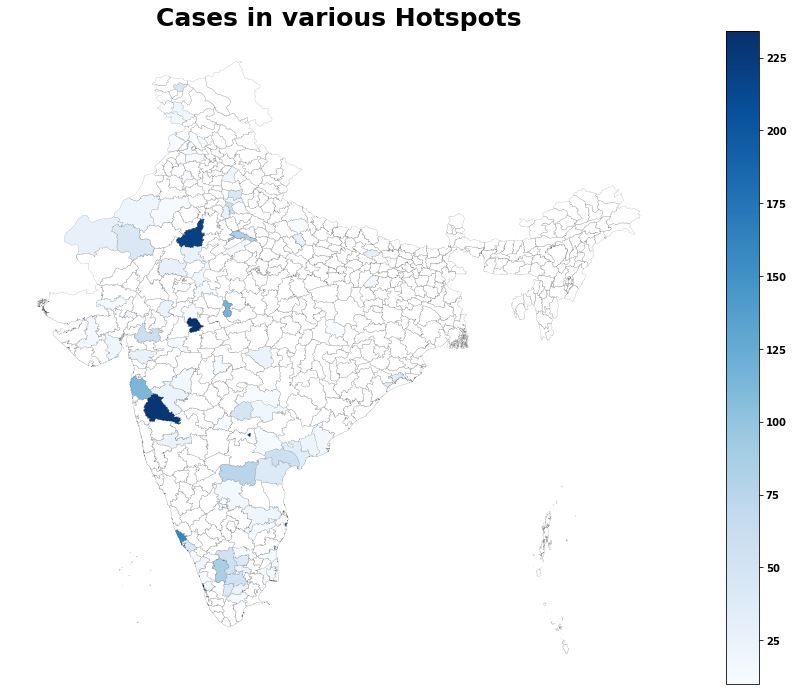

In [6]:
Hotspot_map= map_df.set_index('NAME_2').join(districts.set_index('detected_district'))
Hotspot_map
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis('off')
ax.set_title('Cases in various Hotspots', fontdict={'fontsize': '25', 'fontweight' : '3'})
Hotspot_map.plot(column='Active_Cases', cmap='Blues', linewidth=0.1, ax=ax, edgecolor='0.1', legend=True)